In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import tensorflow as tf

In [95]:
path='phi_080_all_data.csv'
df = pd.read_csv(path)

In [96]:
label_encoder = LabelEncoder()
scaler= StandardScaler()
df['polymer'] = label_encoder.fit_transform(df['polymer'])
# features= df.iloc[:, 2:]
df[df.columns[2:]]=scaler.fit_transform(df[df.columns[2:]])

In [97]:
# features

In [98]:
#  for i in range (2,len(df.columns)):
#     label=df.columns[i]
#     plt.hist(df[df['polymer']==0][label],color='blue',label='PA',alpha=0.7,density=True,bins=15)
#     plt.hist(df[df['polymer']==1][label],color='red',label='PC',alpha=0.7,density=True,bins=15)
#     plt.title(label)
#     plt.ylabel('Probability')
#     plt.xlabel(label)
#     plt.legend()
#     plt.show()

In [99]:
X = df[df.columns[8:]].values
Y = df[df.columns[1]].values
name='All values of (nid)'

In [100]:
X

array([[-0.02659863, -0.09181107,  0.27733336,  0.08944143,  0.10785651,
         0.54659323],
       [ 0.62695597,  0.57960091,  0.81622829,  0.78037213,  0.75093001,
         0.80371139],
       [ 0.51919349,  0.45550761,  0.86290513,  0.84614917,  0.84535609,
         0.7269522 ],
       ...,
       [-1.31062041, -1.31000753, -0.6267258 , -0.78658183, -0.75438287,
        -0.0571289 ],
       [-1.33504675, -1.32980544, -0.66220387, -0.81372609, -0.78152854,
        -0.16459332],
       [-1.32298669, -1.32147918, -0.63876095, -0.79585115, -0.76293827,
        -0.09098922]])

In [101]:
# x_train, x_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.20, random_state=0)
# x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.30, random_state=0)


In [102]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42, shuffle=True, stratify=Y)

In [103]:
# def get_score(model, x_train, x_test, y_train, y_test):
    
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
#     model.fit(x_train, y_train,batch_size=32, epochs=200,verbose=1)
#     model.evaluate(x_train, y_train)
#     return model.score(x_test, y_test)

In [104]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(units=512, activation='relu'),
#     tf.keras.layers.Dense(units=256, activation='relu'),
#     tf.keras.layers.Dense(units=128, activation='relu'),
#     tf.keras.layers.Dense(units=64, activation='relu'),
#     tf.keras.layers.Dense(units=32, activation='relu'),
#     tf.keras.layers.Dense(units=12, activation= 'softmax')
    
# ])

In [105]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
oos_y = []
oos_pred = []

fold = 0

for train, test in kf.split(X,Y):
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = X[train]
    y_train = Y[train]
    x_test = X[test]
    y_test = Y[test]
    
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=12, activation= 'softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
    model.fit(x_train, y_train, batch_size=32, epochs=200,verbose=1)
    
    pred = model.predict(x_test)
    
#     oos_y.append(y_test)
#     oos_pred.append(pred)    

#     # Measure this fold's RMSE
#     score = np.sqrt(metrics.mean_squared_error(pred,y_test))
#     print(f"Fold score (RMSE): {score}")
    
# Build the oos prediction list and calculate the error.
# oos_y = np.concatenate(oos_y)
# oos_pred = np.concatenate(oos_pred)
# score = np.sqrt(metrics.mean_squared_error(oos_pred,oos_y))
# print(f"Final, out of sample score (RMSE): {score}")    
    
# Write the cross-validated prediction
# oos_y = pd.DataFrame(oos_y)
# oos_pred = pd.DataFrame(oos_pred)
# oosDF = pd.concat( [df, oos_y, oos_pred],axis=1 )
#oosDF.to_csv(filename_write,index=False)
    
    
# for train_index, test_index in folds.split(X,Y):
#     x_train, x_test, y_train, y_test = X[train_index], X[test_index],Y[train_index], Y[test_index]
#     scores_mlp.append(get_score(model, x_train, x_test, y_train, y_test))  

Fold #1
Epoch 1/200
15/15 [==============================] - 1s 8ms/step - loss: 2.3007 - accuracy: 0.1854
Epoch 2/200
15/15 [==============================] - 0s 7ms/step - loss: 1.7289 - accuracy: 0.4229
Epoch 3/200
15/15 [==============================] - 0s 7ms/step - loss: 1.1786 - accuracy: 0.5333
Epoch 4/200
15/15 [==============================] - 0s 7ms/step - loss: 0.9204 - accuracy: 0.6333
Epoch 5/200
15/15 [==============================] - 0s 7ms/step - loss: 0.7674 - accuracy: 0.6979
Epoch 6/200
15/15 [==============================] - 0s 10ms/step - loss: 0.6947 - accuracy: 0.7042
Epoch 7/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6747 - accuracy: 0.7146
Epoch 8/200
15/15 [==============================] - 0s 6ms/step - loss: 0.5979 - accuracy: 0.7396
Epoch 9/200
15/15 [==============================] - 0s 6ms/step - loss: 0.5564 - accuracy: 0.7521
Epoch 10/200
15/15 [==============================] - 0s 6ms/step - loss: 0.5369 - accuracy: 0.7833


15/15 [==============================] - 0s 6ms/step - loss: 0.2508 - accuracy: 0.8771
Epoch 83/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2621 - accuracy: 0.8750
Epoch 84/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2599 - accuracy: 0.8792
Epoch 85/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2663 - accuracy: 0.8792
Epoch 86/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2612 - accuracy: 0.8792
Epoch 87/200
15/15 [==============================] - 0s 7ms/step - loss: 0.3189 - accuracy: 0.8583
Epoch 88/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2743 - accuracy: 0.8667
Epoch 89/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2589 - accuracy: 0.8708
Epoch 90/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2565 - accuracy: 0.8625
Epoch 91/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2452 - accuracy: 0.8917
Epoch 92/200


15/15 [==============================] - 0s 6ms/step - loss: 0.2388 - accuracy: 0.8896
Epoch 164/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2578 - accuracy: 0.8792
Epoch 165/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2267 - accuracy: 0.8792
Epoch 166/200
15/15 [==============================] - 0s 7ms/step - loss: 0.2554 - accuracy: 0.8771
Epoch 167/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2355 - accuracy: 0.8938
Epoch 168/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2417 - accuracy: 0.8917
Epoch 169/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2322 - accuracy: 0.8875
Epoch 170/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2241 - accuracy: 0.8854
Epoch 171/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2239 - accuracy: 0.8938
Epoch 172/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2318 - accuracy: 0.8875
Epoc

15/15 [==============================] - 0s 6ms/step - loss: 0.3031 - accuracy: 0.8542
Epoch 45/200
15/15 [==============================] - 0s 6ms/step - loss: 0.3367 - accuracy: 0.8313
Epoch 46/200
15/15 [==============================] - 0s 6ms/step - loss: 0.3107 - accuracy: 0.8500
Epoch 47/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2632 - accuracy: 0.8792
Epoch 48/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2717 - accuracy: 0.8750
Epoch 49/200
15/15 [==============================] - 0s 6ms/step - loss: 0.3022 - accuracy: 0.8479
Epoch 50/200
15/15 [==============================] - 0s 6ms/step - loss: 0.3130 - accuracy: 0.8417
Epoch 51/200
15/15 [==============================] - 0s 7ms/step - loss: 0.2741 - accuracy: 0.8708
Epoch 52/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2972 - accuracy: 0.8646
Epoch 53/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2581 - accuracy: 0.8771
Epoch 54/200


15/15 [==============================] - 0s 6ms/step - loss: 0.2711 - accuracy: 0.8562
Epoch 126/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2461 - accuracy: 0.8875
Epoch 127/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2380 - accuracy: 0.8854
Epoch 128/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2291 - accuracy: 0.9021
Epoch 129/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2364 - accuracy: 0.8792
Epoch 130/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2311 - accuracy: 0.8833
Epoch 131/200
15/15 [==============================] - 0s 7ms/step - loss: 0.2459 - accuracy: 0.8771
Epoch 132/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2478 - accuracy: 0.8792
Epoch 133/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2488 - accuracy: 0.8729
Epoch 134/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2411 - accuracy: 0.8833
Epoc

15/15 [==============================] - 0s 6ms/step - loss: 0.8168 - accuracy: 0.6417
Epoch 6/200
15/15 [==============================] - 0s 5ms/step - loss: 0.7053 - accuracy: 0.6812
Epoch 7/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6145 - accuracy: 0.7188
Epoch 8/200
15/15 [==============================] - 0s 6ms/step - loss: 0.5507 - accuracy: 0.7354
Epoch 9/200
15/15 [==============================] - 0s 6ms/step - loss: 0.5308 - accuracy: 0.7563
Epoch 10/200
15/15 [==============================] - 0s 6ms/step - loss: 0.4791 - accuracy: 0.7833
Epoch 11/200
15/15 [==============================] - 0s 8ms/step - loss: 0.4588 - accuracy: 0.7646
Epoch 12/200
15/15 [==============================] - 0s 7ms/step - loss: 0.4464 - accuracy: 0.7771
Epoch 13/200
15/15 [==============================] - 0s 7ms/step - loss: 0.4080 - accuracy: 0.8104
Epoch 14/200
15/15 [==============================] - 0s 7ms/step - loss: 0.3956 - accuracy: 0.8042
Epoch 15/200
15/1

15/15 [==============================] - 0s 6ms/step - loss: 0.2874 - accuracy: 0.8479
Epoch 88/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2628 - accuracy: 0.8813
Epoch 89/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2803 - accuracy: 0.8625
Epoch 90/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2591 - accuracy: 0.8792
Epoch 91/200
15/15 [==============================] - 0s 7ms/step - loss: 0.2379 - accuracy: 0.8854
Epoch 92/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2560 - accuracy: 0.8729
Epoch 93/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2525 - accuracy: 0.8875
Epoch 94/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2513 - accuracy: 0.8896
Epoch 95/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2735 - accuracy: 0.8583
Epoch 96/200
15/15 [==============================] - 0s 7ms/step - loss: 0.2651 - accuracy: 0.8854
Epoch 97/200


15/15 [==============================] - 0s 6ms/step - loss: 0.2283 - accuracy: 0.8792
Epoch 169/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2309 - accuracy: 0.8750
Epoch 170/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2412 - accuracy: 0.8854
Epoch 171/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2253 - accuracy: 0.8917
Epoch 172/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2333 - accuracy: 0.8750
Epoch 173/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2565 - accuracy: 0.8729
Epoch 174/200
15/15 [==============================] - 0s 7ms/step - loss: 0.2843 - accuracy: 0.8667
Epoch 175/200
15/15 [==============================] - 0s 7ms/step - loss: 0.3026 - accuracy: 0.8438
Epoch 176/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2968 - accuracy: 0.8458
Epoch 177/200
15/15 [==============================] - 0s 7ms/step - loss: 0.2461 - accuracy: 0.8813
Epoc

15/15 [==============================] - 0s 6ms/step - loss: 0.3563 - accuracy: 0.8083
Epoch 50/200
15/15 [==============================] - 0s 6ms/step - loss: 0.3586 - accuracy: 0.8229
Epoch 51/200
15/15 [==============================] - 0s 6ms/step - loss: 0.3557 - accuracy: 0.8188
Epoch 52/200
15/15 [==============================] - 0s 6ms/step - loss: 0.3053 - accuracy: 0.8500
Epoch 53/200
15/15 [==============================] - 0s 5ms/step - loss: 0.3071 - accuracy: 0.8542
Epoch 54/200
15/15 [==============================] - 0s 6ms/step - loss: 0.3009 - accuracy: 0.8500
Epoch 55/200
15/15 [==============================] - 0s 6ms/step - loss: 0.3165 - accuracy: 0.8458
Epoch 56/200
15/15 [==============================] - 0s 6ms/step - loss: 0.3053 - accuracy: 0.8604
Epoch 57/200
15/15 [==============================] - 0s 5ms/step - loss: 0.2836 - accuracy: 0.8604
Epoch 58/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2904 - accuracy: 0.8583
Epoch 59/200


15/15 [==============================] - 0s 6ms/step - loss: 0.2652 - accuracy: 0.8646
Epoch 131/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2769 - accuracy: 0.8687
Epoch 132/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2364 - accuracy: 0.8896
Epoch 133/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2517 - accuracy: 0.8771
Epoch 134/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2568 - accuracy: 0.8813
Epoch 135/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2690 - accuracy: 0.8667
Epoch 136/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2498 - accuracy: 0.8792
Epoch 137/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2501 - accuracy: 0.8792
Epoch 138/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2609 - accuracy: 0.8708
Epoch 139/200
15/15 [==============================] - 0s 5ms/step - loss: 0.3389 - accuracy: 0.8458
Epoc

15/15 [==============================] - 0s 7ms/step - loss: 0.5602 - accuracy: 0.7604
Epoch 11/200
15/15 [==============================] - 0s 7ms/step - loss: 0.5012 - accuracy: 0.7771
Epoch 12/200
15/15 [==============================] - 0s 5ms/step - loss: 0.4588 - accuracy: 0.8000
Epoch 13/200
15/15 [==============================] - 0s 6ms/step - loss: 0.4649 - accuracy: 0.7979
Epoch 14/200
15/15 [==============================] - 0s 6ms/step - loss: 0.5140 - accuracy: 0.7708
Epoch 15/200
15/15 [==============================] - 0s 5ms/step - loss: 0.4406 - accuracy: 0.7937
Epoch 16/200
15/15 [==============================] - 0s 5ms/step - loss: 0.4126 - accuracy: 0.8062
Epoch 17/200
15/15 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8000
Epoch 18/200
15/15 [==============================] - 0s 6ms/step - loss: 0.3983 - accuracy: 0.8188
Epoch 19/200
15/15 [==============================] - 0s 5ms/step - loss: 0.4104 - accuracy: 0.8021
Epoch 20/200


15/15 [==============================] - 0s 6ms/step - loss: 0.3198 - accuracy: 0.8354
Epoch 93/200
15/15 [==============================] - 0s 5ms/step - loss: 0.2668 - accuracy: 0.8604
Epoch 94/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2815 - accuracy: 0.8313
Epoch 95/200
15/15 [==============================] - 0s 5ms/step - loss: 0.2893 - accuracy: 0.8646
Epoch 96/200
15/15 [==============================] - 0s 5ms/step - loss: 0.2768 - accuracy: 0.8583
Epoch 97/200
15/15 [==============================] - 0s 5ms/step - loss: 0.3002 - accuracy: 0.8562
Epoch 98/200
15/15 [==============================] - 0s 5ms/step - loss: 0.2673 - accuracy: 0.8729
Epoch 99/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2684 - accuracy: 0.8750
Epoch 100/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2720 - accuracy: 0.8687
Epoch 101/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2582 - accuracy: 0.8646
Epoch 102/2

15/15 [==============================] - 0s 6ms/step - loss: 0.2428 - accuracy: 0.8813
Epoch 174/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2600 - accuracy: 0.8729
Epoch 175/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2561 - accuracy: 0.8833
Epoch 176/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2648 - accuracy: 0.8667
Epoch 177/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2501 - accuracy: 0.8792
Epoch 178/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2460 - accuracy: 0.8792
Epoch 179/200
15/15 [==============================] - 0s 7ms/step - loss: 0.2451 - accuracy: 0.8833
Epoch 180/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2396 - accuracy: 0.8750
Epoch 181/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2417 - accuracy: 0.8771
Epoch 182/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2482 - accuracy: 0.8750
Epoc

In [106]:
# scores_tf

In [107]:
# def get_average(scores_mlp):
#     average_accuracy=np.mean(scores_mlp)
#     return average_accuracy

In [108]:
# get_average(scores_mlp)

In [109]:
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics=['accuracy'])

In [110]:
model.evaluate(x_train, y_train)

15/15 [==============================] - 0s 6ms/step - loss: 0.3264 - accuracy: 0.8417


[0.3263583779335022, 0.8416666388511658]

In [111]:
# model.evaluate(x_valid, y_valid)

In [112]:
# model.fit(x_train, y_train, batch_size=32, epochs=200,verbose=1)

In [113]:
# model.evaluate(x_test, y_test)

In [114]:
# Predicting the test set results
# y_pred = model.predict(x_test)
# y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 9ms/step


In [115]:
# # confusion matrix
# import seaborn as sns
# from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
# cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
# plt.subplots(figsize=(12,8))
# cf_matrix = confusion_matrix(y_test, y_pred)
# sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [116]:
def performance_measurment(cm):
   
    FP = cm.sum(axis=1) - np.diag(cm)  
    FN = cm.sum(axis=0) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    ACC1 = np.round((TP+TN)/(TP+FP+FN+TN),decimals=2)
    precision1 = np.round((TP / (TP + FP)),decimals=2)
    recall1 = np.round((TP / (TP + FN)),decimals=2)
    F1_SCORE1 = np.round((2*recall1*precision1)/(recall1+precision1),decimals=2)

    
    return ACC1, precision1, recall1, F1_SCORE1



Combination:All values of (nid)  Accuracy: 0.82
Precision: 0.83  Recall: 0.82  F1-SCORE: 0.82
Combination:All values of (nid)  Accuracy_Matrix: [1.   0.99 0.94 0.94 0.93 0.98 1.   0.96 0.92 1.   0.98 1.  ]
Precision_Matrix: [1.  1.  0.9 0.4 0.7 0.8 1.  0.7 0.4 1.  1.  1. ]
  Recall_MAtrix: [1.   0.91 0.6  0.8  0.58 1.   1.   0.78 0.5  1.   0.83 1.  ]
 F1-SCORE_Matrix: [1.   0.95 0.72 0.53 0.63 0.89 1.   0.74 0.44 1.   0.91 1.  ]


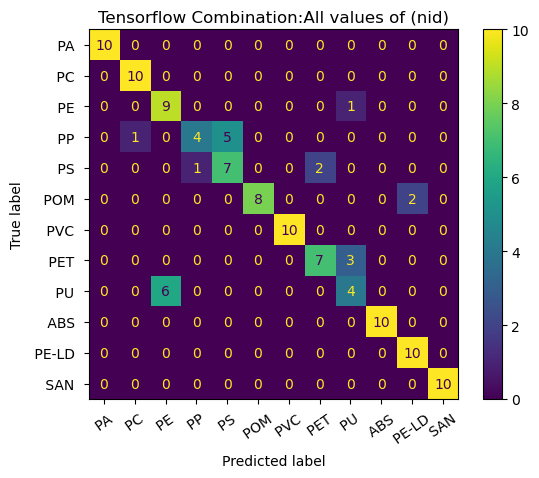

In [117]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,accuracy_score,ConfusionMatrixDisplay
y_pred_org = []

for i in range(len(y_pred)):
    y_pred_org.append(np.argmax(y_pred[i]))

y_pred_org = np.array(y_pred_org)
# print(y_test[0])
# print(np.argmax(y_pred[0]))
precision=round(precision_score(y_test, y_pred_org,average='weighted'),2)
recall=round(recall_score(y_test, y_pred_org,average='weighted'),2)
accuracy=round(accuracy_score(y_test, y_pred_org),2)
F1_SCORE=round(f1_score(y_test, y_pred_org,average='weighted'),2)

cm = confusion_matrix(y_test, y_pred_org)
ACC1, precision1, recall1, F1_SCORE1 = performance_measurment(cm)

# acc = accuracy(cm)

class_names = [" PA ", " PC ", " PE ", " PP ", " PS "," POM "," PVC "," PET "," PU "," ABS "," PE-LD "," SAN "]
#plot_confusion_matrix(ann, x_test, y_test, display_labels=class_names)
degrees = 35

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names,)
disp.plot(xticks_rotation=degrees)

plt.title("Tensorflow Combination:" + str(name))
print("Combination:" + str(name) +"  Accuracy: " + str(accuracy) +  "\nPrecision: "+ str(precision)+"  Recall: "+ str(recall)  + "  F1-SCORE: "+ str(F1_SCORE))
print("Combination:" + str(name) +"  Accuracy_Matrix: " + str(ACC1) +  "\nPrecision_Matrix: "+ str(precision1) +"\n  Recall_MAtrix: "+ str(recall1) + "\n F1-SCORE_Matrix: "+ str(F1_SCORE1))
plt.savefig('phi_080_all_data.png')
#plt.savefig(r'C:\pyyy\auswertung\polymers\MLP_without_early_stopping\\' +name+"_tf_without_early_stopping.png")


In [118]:
X

array([[-0.02659863, -0.09181107,  0.27733336,  0.08944143,  0.10785651,
         0.54659323],
       [ 0.62695597,  0.57960091,  0.81622829,  0.78037213,  0.75093001,
         0.80371139],
       [ 0.51919349,  0.45550761,  0.86290513,  0.84614917,  0.84535609,
         0.7269522 ],
       ...,
       [-1.31062041, -1.31000753, -0.6267258 , -0.78658183, -0.75438287,
        -0.0571289 ],
       [-1.33504675, -1.32980544, -0.66220387, -0.81372609, -0.78152854,
        -0.16459332],
       [-1.32298669, -1.32147918, -0.63876095, -0.79585115, -0.76293827,
        -0.09098922]])